## todo


- add cm
- add xgboost to custom.json
- add cleaning
- add scaling
- add PCA , t-SNE
- add other datasets
- - iris, moon, blobs


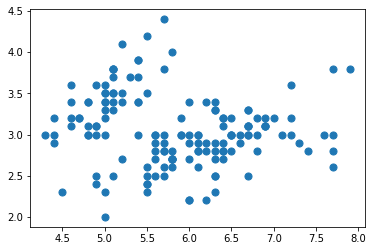

In [1]:
%matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

iris = load_iris()

data_X, data_y = iris.data,iris.target
plt.scatter(data_X[:, 0], data_X[:, 1], s=50);

In [2]:
%load_ext autoreload
%autoreload 2
packages = !conda list
packages

['# packages in environment at /opt/conda:',
 '#',
 '# Name                    Version                   Build  Channel',
 '_libgcc_mutex             0.1                 conda_forge    conda-forge',
 '_openmp_mutex             4.5                       0_gnu    conda-forge',
 'alembic                   1.4.2              pyh9f0ad1d_0    conda-forge',
 'astroid                   2.4.1                    pypi_0    pypi',
 'astunparse                1.6.3                    pypi_0    pypi',
 'async_generator           1.10                       py_0    conda-forge',
 'attrs                     19.3.0                     py_0    conda-forge',
 'backcall                  0.1.0                      py_0    conda-forge',
 'bleach                    3.1.4              pyh9f0ad1d_0    conda-forge',
 'blinker                   1.4                        py_1    conda-forge',
 'brotlipy                  0.7.0           py37h8f50634_1000    conda-forge',
 'ca-certificates           2020.4.5.1     

In [3]:
!pwd


/docker/photon_experiments


## Output registry

In [4]:
from __future__ import print_function
import sys, os

old__file__ = !pwd
__file__ = !cd ../photon ;pwd
#__file__ = !pwd
__file__ = __file__[0]
__file__
sys.path.append(__file__)
print(sys.path)
os.chdir(old__file__[0])
!pwd
old__file__[0]

['/docker/photon_experiments', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '', '/opt/conda/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/home/jovyan/.ipython', '/docker/photon']
/docker/photon_experiments


'/docker/photon_experiments'

In [5]:

import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold


from photonai.base import Hyperpipe, PipelineElement, Preprocessing, OutputSettings
from photonai.optimization import FloatRange, Categorical, IntegerRange
from photonai.base.photon_elements import PhotonRegistry
#from photonai.base.registry.registry import PhotonRegistry

/opt/conda/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [6]:
#import pixiedust


In [7]:
def results_to_df(results):
    ll = []
    for obj in results:
        ll.append([obj.operation,
        obj.value,
        obj.metric_name])
    _results=pd.DataFrame(ll).pivot(index=2, columns=0, values=1)
    _results.columns=['Mean','STD']
    
    return(_results)

In [8]:
__file__ = "exp1.log"
base_folder = os.path.dirname(os.path.abspath(''))
custom_elements_folder = os.path.join(base_folder, 'custom_elements')
custom_elements_folder

'/docker/custom_elements'

In [9]:
registry = PhotonRegistry(custom_elements_folder=custom_elements_folder)
registry.activate()
registry.PHOTON_REGISTRIES,PhotonRegistry.PHOTON_REGISTRIES

(['PhotonCore', 'PhotonCluster', 'PhotonNeuro', 'CustomElements'],
 ['PhotonCore', 'PhotonCluster', 'PhotonNeuro', 'CustomElements'])

In [10]:
registry.activate()
registry.list_available_elements()
# take off last name


PhotonCore
ARDRegression                       sklearn.linear_model.ARDRegression                                          Estimator
AdaBoostClassifier                  sklearn.ensemble.AdaBoostClassifier                                         Estimator
AdaBoostRegressor                   sklearn.ensemble.AdaBoostRegressor                                          Estimator
BaggingClassifier                   sklearn.ensemble.BaggingClassifier                                          Estimator
BaggingRegressor                    sklearn.ensemble.BaggingRegressor                                           Estimator
BayesianGaussianMixture             sklearn.mixture.BayesianGaussianMixture                                     Estimator
BayesianRidge                       sklearn.linear_model.BayesianRidge                                          Estimator
BernoulliNB                         sklearn.naive_bayes.BernoulliNB                                             Estimator
BernoulliRBM

## KMedoids iris

In [11]:
registry.info("KMedoids")

----------------------------------
Name: KMedoids
Namespace: sklearn_extra.cluster
----------------------------------
Possible Hyperparameters as derived from constructor:
n_clusters                          n_clusters=8                                                               
metric                              metric='euclidean'                                                         
init                                init='heuristic'                                                           
max_iter                            max_iter=300                                                               
random_state                        random_state=None                                                          
----------------------------------


('KMedoids',
 'sklearn_extra.cluster',
 {'n_clusters': 'n_clusters',
  'metric': 'metric',
  'init': 'init',
  'max_iter': 'max_iter',
  'random_state': 'random_state'})

In [12]:
#import pixiedust
#%%pixie_debugger

"""
Example script for KMedoids hopt
"""
X, y = data_X, data_y
# DESIGN YOUR PIPELINE
settings = OutputSettings(project_folder='./tmp/')

my_pipe = Hyperpipe('batching',
                    optimizer='sk_opt',
#                    optimizer_params={'n_configurations': 25},
                    metrics=['ARI', 'MI', 'HCV', 'FM'],
                    best_config_metric='ARI',
                    outer_cv=KFold(n_splits=5),
                    inner_cv=KFold(n_splits=10),
                    verbosity=0,
                    output_settings=settings)


my_pipe += PipelineElement('KMedoids', hyperparameters={
                                                    'n_clusters': IntegerRange(2, 8),
                                                    },random_state=777)

# NOW TRAIN YOUR PIPELINE
my_pipe.fit(X, y)

debug = True



***************************************************************************************************************
PHOTON ANALYSIS: batching
***************************************************************************************************************

***************************************************************************************************************
Outer Cross validation Fold 1
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMedoids": [
        "n_clusters=2"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.3640      |      1.0000      |
|   MI   |       0.4159      |      1.0000      |
|  HCV   |       0.3507      |      1.0000      |
|   FM   |       0.6440      |      1.0000      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 2
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMedoids": [
        "n_clusters=2"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.4724      |      1.0000      |
|   MI   |       0.6420      |      1.0000      |
|  HCV   |       0.4940      |      1.0000      |
|   FM   |       0.7344      |      1.0000      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 3
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMedoids": [
        "n_clusters=3"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.5281      |      0.0000      |
|   MI   |       0.6197      |      0.0000      |
|  HCV   |       0.6152      |      1.0000      |
|   FM   |       0.7112      |      0.9661      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 4
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMedoids": [
        "n_clusters=2"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.6659      |      0.0659      |
|   MI   |       0.7710      |      0.0433      |
|  HCV   |       0.6303      |      0.0594      |
|   FM   |       0.8187      |      0.7317      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 5
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMedoids": [
        "n_clusters=2"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.7213      |      1.0000      |
|   MI   |       0.7935      |      1.0000      |
|  HCV   |       0.6606      |      1.0000      |
|   FM   |       0.8516      |      1.0000      |
+--------+-------------------+------------------+

OVERALL BEST CONFIGURATION
{
    "KMedoids": [
        "n_clusters=2"
    ]
}


/docker/photon/photonai/processing/results_handler.py:699: RuntimeWarning: invalid value encountered in double_scalars
  if pct / total >= 1:



Analysis batching done in 0:01:06.747409
Your results are stored in ./tmp/batching_results_2020-05-21_13-09-19
***************************************************************************************************************
PHOTON 1.0.0b - www.photon-ai.com 


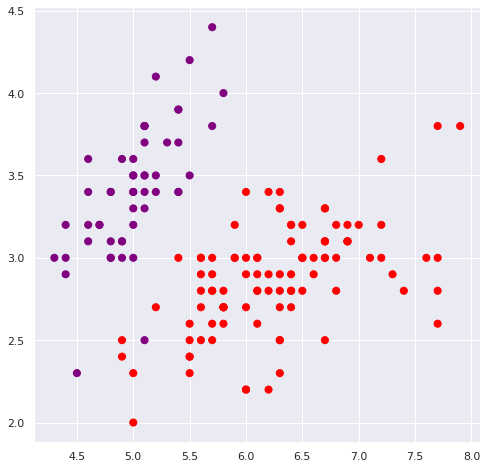

In [13]:
lab= my_pipe.predict(X)
colors = ['red','green','blue','purple']

fig = plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], s=50, c=lab
            ,cmap=matplotlib.colors.ListedColormap(colors) );


In [14]:
pd.DataFrame(my_pipe.best_config.items(),columns=['n_clusters', 'k'])

,n_clusters,k
0,KMedoids__n_clusters,2


In [15]:
train=results_to_df(my_pipe.results.metrics_train)
train

,Mean,STD
2,,
ARI,0.550345,0.129531
FM,0.751968,0.074877
HCV,0.550153,0.114696
MI,0.648437,0.134921


In [16]:
test = results_to_df(my_pipe.results.metrics_test)
test

,Mean,STD
2,,
ARI,0.613180,0.474214
FM,0.939551,0.104770
HCV,0.811872,0.376256
MI,0.608653,0.479495


In [17]:
test-train

,Mean,STD
2,,
ARI,0.062835,0.344684
FM,0.187583,0.029893
HCV,0.261719,0.261560
MI,-0.039784,0.344574


## Show kmeans iris

In [18]:
registry.info("KMeans")

----------------------------------
Name: KMeans
Namespace: sklearn.cluster
----------------------------------
Possible Hyperparameters as derived from constructor:
n_clusters                          n_clusters=8                                                               
init                                init='k-means++'                                                           
n_init                              n_init=10                                                                  
max_iter                            max_iter=300                                                               
tol                                 tol=0.0001                                                                 
precompute_distances                precompute_distances='auto'                                                
verbose                             verbose=0                                                                  
random_state                        random_state=Non

('KMeans',
 'sklearn.cluster',
 {'n_clusters': 'n_clusters',
  'init': 'init',
  'n_init': 'n_init',
  'max_iter': 'max_iter',
  'tol': 'tol',
  'precompute_distances': 'precompute_distances',
  'verbose': 'verbose',
  'random_state': 'random_state',
  'copy_x': 'copy_x',
  'n_jobs': 'n_jobs',
  'algorithm': 'algorithm'})

In [19]:
#import pixiedust
#%%pixie_debugger

"""
Example script for kmeans hopt
"""

X, y = data_X, data_y
# DESIGN YOUR PIPELINE
settings = OutputSettings(project_folder='./tmp/')

my_pipe = Hyperpipe('batching',
                    optimizer='sk_opt',
#                    optimizer_params={'n_configurations': 25},
                    metrics=['ARI', 'MI', 'HCV', 'FM'],
                    best_config_metric='ARI',
                    outer_cv=KFold(n_splits=5),
                    inner_cv=KFold(n_splits=10),
                    verbosity=0,
                    output_settings=settings)


my_pipe += PipelineElement('KMeans', hyperparameters={
                                                    'n_clusters': IntegerRange(2, 8),
                                                    },random_state=777)

# NOW TRAIN YOUR PIPELINE
my_pipe.fit(X, y)

debug = True




***************************************************************************************************************
PHOTON ANALYSIS: batching
***************************************************************************************************************

***************************************************************************************************************
Outer Cross validation Fold 1
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=2"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.3425      |      1.0000      |
|   MI   |       0.4970      |      1.0000      |
|  HCV   |       0.3737      |      1.0000      |
|   FM   |       0.6874      |      1.0000      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 2
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=2"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.4654      |      0.8652      |
|   MI   |       0.6160      |      0.7998      |
|  HCV   |       0.4768      |      0.7895      |
|   FM   |       0.7278      |      0.9400      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 3
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=2"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.7060      |      0.0000      |
|   MI   |       0.7156      |      0.0000      |
|  HCV   |       0.5990      |      1.0000      |
|   FM   |       0.8411      |      0.9661      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 4
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=2"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.6659      |      0.0659      |
|   MI   |       0.7710      |      0.0433      |
|  HCV   |       0.6303      |      0.0594      |
|   FM   |       0.8187      |      0.7317      |
+--------+-------------------+------------------+

***************************************************************************************************************
Outer Cross validation Fold 5
***************************************************************************************************************


/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/conda/lib/python3.7/site-packa

---------------------------------------------------------------------------------------------------------------
BEST_CONFIG 
---------------------------------------------------------------------------------------------------------------
{
    "KMeans": [
        "n_clusters=2"
    ]
}
+--------+-------------------+------------------+
| METRIC | PERFORMANCE TRAIN | PERFORMANCE TEST |
+--------+-------------------+------------------+
|  ARI   |       0.6989      |      1.0000      |
|   MI   |       0.7472      |      1.0000      |
|  HCV   |       0.6234      |      1.0000      |
|   FM   |       0.8380      |      1.0000      |
+--------+-------------------+------------------+

OVERALL BEST CONFIGURATION
{
    "KMeans": [
        "n_clusters=2"
    ]
}


/docker/photon/photonai/processing/results_handler.py:699: RuntimeWarning: invalid value encountered in double_scalars
  if pct / total >= 1:



Analysis batching done in 0:01:51.360538
Your results are stored in ./tmp/batching_results_2020-05-21_13-10-28
***************************************************************************************************************
PHOTON 1.0.0b - www.photon-ai.com 


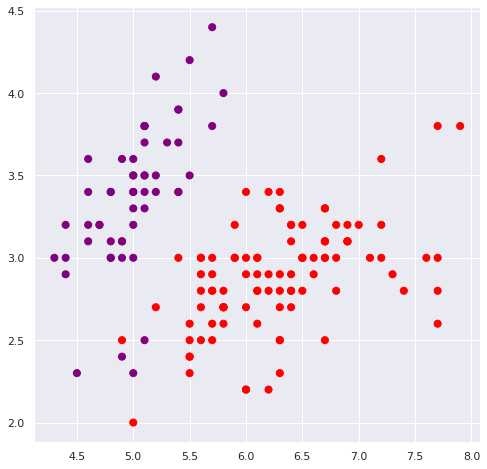

In [20]:
lab= my_pipe.predict(X)
colors = ['red','green','blue','purple']

fig = plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], s=50, c=lab
            ,cmap=matplotlib.colors.ListedColormap(colors) );

In [21]:
pd.DataFrame(my_pipe.best_config.items(),columns=['n_clusters', 'k'])

,n_clusters,k
0,KMeans__n_clusters,2


In [22]:
train=results_to_df(my_pipe.results.metrics_train)
train

,Mean,STD
2,,
ARI,0.575757,0.146168
FM,0.782599,0.063043
HCV,0.540644,0.100244
MI,0.669357,0.101075


In [23]:
test = results_to_df(my_pipe.results.metrics_test)
test

,Mean,STD
2,,
ARI,0.586229,0.454900
FM,0.927542,0.100508
HCV,0.769764,0.364441
MI,0.568623,0.452762


In [24]:
test-train

,Mean,STD
2,,
ARI,0.010471,0.308733
FM,0.144943,0.037464
HCV,0.229121,0.264198
MI,-0.100734,0.351687
